In [1]:
%matplotlib inline
from setting.matplotlib_ import *
from setting.tools import *

In [2]:
print("This notebook was built with:")
print("python version: %s " % sys.version)
print("PCSE version: %s" %  pcse.__version__)

This notebook was built with:
python version: 3.9.7 (default, Sep 16 2021, 13:09:58) 
[GCC 7.5.0] 
PCSE version: 5.5.0


## Loading environment data

In [3]:
target_env = pd.read_csv('./data/pap_env_RDA_open.csv', skiprows=1, header=None)
target_env.loc[:, 0] = pd.DatetimeIndex(target_env.loc[:, 0])
template = pd.read_excel('./data/data_template.xls', header=None)

농진청 공개 데이터 중 하나를 사용했습니다.

In [4]:
template.head()

,0,1,2,3,4,5,6,7
0,Site Characteristics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Country,Republic of Korea,NaN,NaN,NaN,NaN,NaN,NaN
2,Station,Republic of Korea,NaN,NaN,NaN,NaN,NaN,NaN
3,Description,RDA smartfarm open data,NaN,NaN,NaN,NaN,NaN,NaN
4,Source,Rural Development Administration,NaN,NaN,NaN,NaN,NaN,NaN


Custom data 사용을 위해 `ExcelWeatherDataProvider`를 사용합니다. <br>
`ExcelWeatherDataProvider`의 정해진 형식을 따르기 위해 template.xls에 custom data를 합처야 합니다.

In [5]:
target_env = pd.concat([template.loc[:11], target_env], axis=0)

In [6]:
target_env.head()

,0,1,2,3,4,5,6,7
0,Site Characteristics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Country,Republic of Korea,NaN,NaN,NaN,NaN,NaN,NaN
2,Station,Republic of Korea,NaN,NaN,NaN,NaN,NaN,NaN
3,Description,RDA smartfarm open data,NaN,NaN,NaN,NaN,NaN,NaN
4,Source,Rural Development Administration,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
target_env.to_excel('./data/pap_env_processed.xls', index=False, header=False)

/tmp/ipykernel_307634/2866564418.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  target_env.to_excel('./data/pap_env_processed.xls', index=False, header=False)


`ExcelWeatherDataProvider`는 저장된 파일에서부터 환경을 불러오기 때문에, 엑셀 파일로 저장합니다. <br>
`ExcelWeatherDataProvider`는 xlsx를 읽지 못합니다. xls 형식이 오래되어 오류가 발생하지만, 추후 업데이트되길 바라며 지나갑니다.

## Loading growth data

In [8]:
target_output = pd.read_csv(f'./data/pap_grw_RDA_open.csv', index_col='date')
target_output['LAI'] = (target_output['lefCunt']*target_output['lefLt']*target_output['lefBt'])/1000
target_output.index = pd.DatetimeIndex(target_output.index)

In [9]:
target_output.head()

,frtstGrupp,lefstalklt,frtstSetCo,pllnLt,flanGrupp,frtstCo,flanJnt,tcdmt,frmhsFclu,hvstGrupp,...,lefLt,flwrCo,hvstCo,frmWeek,lefCunt,frtstJnt,lefBt,stemThck,cum_harvest,LAI
date,,,,,,,,,,,,,,,,,,,,,
2018-03-23,0,0,0.0,0,0,0.0,0.0,0,0,0,...,0.000000,0,0,12,0.000000,0.0,0.000000,0.00000,0.0,0.000000
2018-03-30,0,0,0.0,0,0,0.0,0.0,0,0,0,...,0.000000,0,0,13,0.000000,0.0,0.000000,0.00000,0.0,0.000000
2018-04-06,0,0,0.0,0,0,0.0,1.0,0,0,0,...,29.475000,0,0,14,0.000000,1.0,9.875000,10.16250,0.0,0.000000
2018-04-13,0,0,0.0,0,0,0.0,1.0,0,0,0,...,31.942857,0,0,15,0.785714,0.0,10.914286,9.10125,0.0,0.273926
2018-04-20,0,0,0.0,0,0,0.0,1.1,0,0,0,...,32.490000,0,0,16,1.000000,1.0,12.270000,8.72800,0.0,0.398652


In [10]:
target_output.loc[target_output['LAI'] == 0, 'LAI'] = np.nan
target_output.loc[:, 'LAI'] = target_output.loc[:, 'LAI'].ffill()
target_output = target_output.loc[~target_output.loc[:, 'LAI'].isna()]

<AxesSubplot:xlabel='date'>

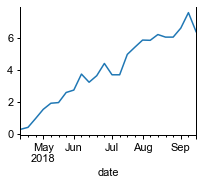

In [11]:
target_output['LAI'].plot()

In [12]:
target_output = target_output.loc[:, 'LAI':'LAI']

In [13]:
target_output.head()

,LAI
date,
2018-04-13,0.273926
2018-04-20,0.398652
2018-04-27,0.953918
2018-05-04,1.526579
2018-05-11,1.908433


먼저 LAI 하나의 목표만 최적화 해보고자 합니다.

In [14]:
CROP_NAME = 'soybean'
VARIETY_NAME = 'Soybean_906'
START_DATE = str(pd.Timestamp('2018-03-23').date()) # starting date was deleted because of dropna
END_DATE = str(target_output.index[-1].date())
CULT_PERIOD = (pd.Timestamp(END_DATE)- pd.Timestamp(START_DATE)).days
print(f'from {START_DATE} to {END_DATE}: {CULT_PERIOD} days')

from 2018-03-23 to 2018-09-21: 182 days


원본 작물은 Soybean입니다. <br>
정식한 순간에 수집한 LAI가 없어서 시작 날짜가 사라졌으므로 직접 작성해줍니다.

## Input data for WOFOST

In [15]:
cropd = YAMLCropDataProvider()
soild = DummySoilDataProvider()
sited = WOFOST72SiteDataProvider(WAV=50, CO2=360.)
params = ParameterProvider(cropdata=cropd, sitedata=sited, soildata=soild)

원본 튜토리얼과 동일하게 불러오는 과정이 필요합니다.

In [16]:
cropd.print_crops_varieties()

crop 'barley', available varieties:
 - 'Spring_barley_301'
crop 'cassava', available varieties:
 - 'Cassava_VanHeemst_1988'
crop 'chickpea', available varieties:
 - 'Chickpea_VanHeemst_1988'
crop 'cotton', available varieties:
 - 'Cotton_VanHeemst_1988'
crop 'cowpea', available varieties:
 - 'Cowpea_VanHeemst_1988'
crop 'fababean', available varieties:
 - 'Faba_bean_801'
crop 'groundnut', available varieties:
 - 'Groundnut_VanHeemst_1988'
crop 'maize', available varieties:
 - 'Maize_VanHeemst_1988'
 - 'Grain_maize_201'
 - 'Grain_maize_202'
 - 'Grain_maize_203'
 - 'Grain_maize_204'
 - 'Grain_maize_205'
crop 'millet', available varieties:
 - 'Millet_VanHeemst_1988'
crop 'mungbean', available varieties:
 - 'Mungbean_VanHeemst_1988'
crop 'pigeonpea', available varieties:
 - 'Pigeonpea_VanHeemst_1988'
crop 'potato', available varieties:
 - 'Potato_701'
 - 'Potato_702'
 - 'Potato_703'
 - 'Potato_704'
crop 'rapeseed', available varieties:
 - 'Oilseed_rape_1001'
 - 'Oilseed_rape_1002'
 - 'Oils

WOFOST에 등록되어 있는 작물과 품종을 확인할 수 있습니다.

In [17]:
# Agromanagement for the custom data
agro_yaml = f"""
- {START_DATE}:
    CropCalendar:
        crop_name: {CROP_NAME}
        variety_name: {VARIETY_NAME}
        crop_start_date: {START_DATE}
        crop_start_type: emergence
        crop_end_date: {END_DATE}
        max_duration: {CULT_PERIOD}
    TimedEvents: null
    StateEvents: null
"""
agro = yaml.load(agro_yaml, Loader=yaml.FullLoader)

yaml 업데이트에 대한 오류가 발생하지만, 작동에는 문제가 없습니다.

In [18]:
wdp = ExcelWeatherDataProvider('./data/pap_env_processed.xls')

위에서 저장한 파일을 불러옵니다.

## WOFOST Initialization

In [19]:
wofost = Wofost72_PP(params, wdp, agro)
wofost.run_till_terminate()

## Parameter selection

In [20]:
target_params = {'TSUM2':[2000, 4000], 'SPAN':[100, 400],
                 'SLATB':[0.001, 0.005, 5, [0, 2]]} # [min, max, repeat, [x_min, x_max]]
target_obj = target_output.columns

하나의 값을 갖는 파라미터 외에 테이블(행렬) 형태로 입력되는 파라미터 -TB가 있습니다. <br>

`TSUM2` anthesis부터 maturity 까지의 적산 온도 <br>
`SPAN` 35도씨에서의 잎 수명 <br>
`SLATB` DVS에 따른 엽비중(specific leaf area) <br>

In [21]:
params._cropdata

{'CO2EFFTB': [40.0, 0.0, 360.0, 1.0, 720.0, 1.11, 1000.0, 1.11, 2000.0, 1.11],
 'CO2TRATB': [40.0, 0.0, 360.0, 1.0, 720.0, 0.9, 1000.0, 0.9, 2000.0, 0.9],
 'CO2AMAXTB': [40.0, 0.0, 360.0, 1.0, 720.0, 1.6, 1000.0, 1.9, 2000.0, 1.9],
 'TBASEM': 7.0,
 'TEFFMX': 22.0,
 'TSUMEM': 90,
 'IDSL': 0,
 'DLO': -99.0,
 'DLC': -99.0,
 'TSUM1': 500,
 'TSUM2': 1300,
 'DTSMTB': [0.0, 0.0, 7.0, 0.0, 30.0, 23.0, 45.0, 38.0],
 'DVSI': 0.0,
 'DVSEND': 2.0,
 'VERNBASE': 14.0,
 'VERNSAT': 70.0,
 'VERNDVS': 0.3,
 'VERNRTB': [-8.0, 0.0, -4.0, 0.0, 3.0, 1.0, 10.0, 1.0, 17.0, 0.0, 20.0, 0.0],
 'TDWI': 120.0,
 'RGRLAI': 0.007,
 'SLATB': [0.0, 0.0014, 0.45, 0.0025, 0.9, 0.0025, 2.0, 0.0007],
 'SPA': 0.0,
 'SSATB': [0.0, 0.0, 2.0, 0.0],
 'SPAN': 23.0,
 'TBASE': 7.0,
 'KDIFTB': [0.0, 0.8, 2.0, 0.8],
 'EFFTB': [0.0, 0.4, 40.0, 0.4],
 'AMAXTB': [0.0, 29.0, 1.7, 29.0, 2.0, 0.0],
 'TMPFTB': [0.0, 0.0, 10.0, 0.3, 20.0, 0.6, 25.0, 0.8, 30.0, 1.0, 35.0, 1.0],
 'TMNFTB': [0.0, 0.0, 3.0, 1.0],
 'CVL': 0.72,
 'CVO': 0.48,
 'C

위처럼 원본 파라미터에 접근할 수 있습니다.

In [22]:
origin_value = {}
for k in target_params:
    v = params._cropdata[k]
    origin_value[k] = v

In [23]:
origin_value

{'TSUM2': 1300,
 'SPAN': 23.0,
 'SLATB': [0.0, 0.0014, 0.45, 0.0025, 0.9, 0.0025, 2.0, 0.0007]}

최적화 완료 후 비교를 위해 목표 파라미터들의 원본값을 저장합니다.

## HyperOpt preparation

In [24]:
space = {}
for k in [_ for _ in target_params if not _.endswith('TB')]:
    space[k] = hp.uniform(k, target_params[k][0], target_params[k][1])
for k in [_ for _ in target_params if _.endswith('TB')]:
    for i in range(target_params[k][2]):
        space[f'{k}_{i}'] = hp.uniform(f'{k}_{i}', target_params[k][0], target_params[k][1])

HyperOpt를 사용하기 위해 목표 파라미터들의 공간을 정의합니다.

## Optimization process

In [25]:
objfunc_calculator = ObjectiveFunctionCalculator(target_params, target_obj, params, wdp, agro, target_output)

In [26]:
best = fmin(fn=objfunc_calculator, space=space, algo=tpe.suggest, max_evals=50)

100%|██████████| 50/50 [00:11<00:00,  4.24trial/s, best loss: 1.442307458251087]


## Result

In [27]:
print('<Calibration result>')
for k in target_params:
    if not k.endswith('TB'):
        print(f'{k}: {origin_value[k]} -> {best[k]:.2f}')
    else:
        temp_list = []
        for v1, v2 in zip(np.linspace(target_params[k][-1][0], target_params[k][-1][1], target_params[k][2]),
                          [_ for _ in best if _.startswith(k)]):
            temp_list.append(v1)
            temp_list.append(best[v2])
        print(f'{k}: {origin_value[k]} -> {[np.round(_, 4) for _ in temp_list]}')

<Calibration result>
TSUM2: 1300 -> 2786.85
SPAN: 23.0 -> 399.72
SLATB: [0.0, 0.0014, 0.45, 0.0025, 0.9, 0.0025, 2.0, 0.0007] -> [0.0, 0.0011, 0.5, 0.0031, 1.0, 0.001, 1.5, 0.0026, 2.0, 0.0045]


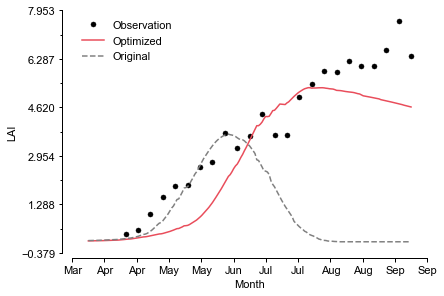

In [28]:
fig = plt.figure(figsize=((8/2.54*2), (6/2.54*1.8)))
ax = plt.subplot()
ax.spines['right'].set_visible(False)
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 5))

ax.plot(target_output.index, target_output.LAI, 'o', ms=5, mew=0.5, mec='k', c='k', label="Observation")
_ = objfunc_calculator(best)
ax.plot(objfunc_calculator.sim.index, objfunc_calculator.sim.LAI, c=cmap[0], label="Optimized")
_ = objfunc_calculator(origin_value, is_train=False)
ax.plot(objfunc_calculator.sim.index, objfunc_calculator.sim.LAI, "--", c='gray', label="Original")

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.xaxis.set_major_locator(LinearLocator(12))
ax.yaxis.set_major_locator(LinearLocator(6))
ax.yaxis.set_minor_locator(LinearLocator(11))
ax.set_xlabel('Month')
ax.set_ylabel('LAI')

ax.legend(frameon=False, loc=0)
fig.tight_layout()
plt.show()

`objfunc_calculator(best)`를 실행해서 최적화된 파라미터로 업데이트가 필요합니다. <br>
업데이트를 하지 않으면 `max_evals`을 마친 파라미터, 즉 과적합된 상태입니다.

기존 파라미터와 비해 줄어들지 않는 LAI를 비교적 잘 맞춘 것을 확인할 수 있습니다.